# Run streamlit app from a Google Colab Notebook
> Created by [Manuel Romero](https://twitter.com/mrm8488)

In [1]:
!pip install -q streamlit

## Create a streamlit app example


In [2]:
%%writefile app.py
import streamlit as st

import numpy as np
import streamlit as st
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.svm import LinearSVC

# Streamlit 頁面設置
st.title("3D and 2D Feature Map Projection with Adjustable Threshold (Non-Circular Distribution)")
st.write("調整距離閾值以查看不同分類效果")

# 步驟 1：生成非圓形分布的數據集
np.random.seed(0)
num_points = 600
mean = 0
variance_x1 = 20  # 增加 x1 的方差
variance_x2 = 5   # 減少 x2 的方差
x1 = np.random.normal(mean, np.sqrt(variance_x1), num_points)
x2 = np.random.normal(mean, np.sqrt(variance_x2), num_points)

# 距離閾值滑桿
threshold = st.slider("Distance Threshold", min_value=1.0, max_value=10.0, value=4.0, step=0.1)

# 計算距離並根據閾值分配標籤
distances = np.sqrt(x1**2 + x2**2)
Y = np.where(distances < threshold, 0, 1)

# 步驟 2：計算 x3 作為 x1 和 x2 的 Gaussian 函數
def gaussian_function(x1, x2):
    return np.exp(-0.1 * (x1**2 + x2**2))

x3 = gaussian_function(x1, x2)

# 步驟 3：訓練 LinearSVC 以找到分離超平面
X = np.column_stack((x1, x2, x3))
clf = LinearSVC(random_state=0, max_iter=10000)
clf.fit(X, Y)
coef = clf.coef_[0]
intercept = clf.intercept_

# 繪製 3D 散點圖與分離超平面
fig_3d = plt.figure(figsize=(10, 8))
ax = fig_3d.add_subplot(111, projection='3d')
ax.scatter(x1[Y == 0], x2[Y == 0], x3[Y == 0], c='blue', marker='o', label='Y=0')
ax.scatter(x1[Y == 1], x2[Y == 1], x3[Y == 1], c='red', marker='s', label='Y=1')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('x3')
ax.set_title('3D Scatter Plot with Y Color and Separating Hyperplane')
ax.legend()

# 創建網格以繪製分離超平面
xx, yy = np.meshgrid(np.linspace(min(x1), max(x1), 10),
                     np.linspace(min(x2), max(x2), 10))
zz = (-coef[0] * xx - coef[1] * yy - intercept) / coef[2]
ax.plot_surface(xx, yy, zz, color='gray', alpha=0.5)

# 顯示 3D 圖在 Streamlit 中
st.pyplot(fig_3d)

# 繪製 2D 投影圖
fig_2d = plt.figure(figsize=(8, 6))
plt.scatter(x1[Y == 0], x2[Y == 0], c='blue', marker='o', label='Y=0')
plt.scatter(x1[Y == 1], x2[Y == 1], c='red', marker='s', label='Y=1')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('2D Projection of Dataset on Feature Map (Non-Circular)')
plt.legend()

# 顯示 2D 圖在 Streamlit 中
st.pyplot(fig_2d)


Overwriting app.py


## Install localtunnel

In [3]:
!npm install localtunnel


up to date, audited 23 packages in 2s

3 packages are looking for funding
  run `npm fund` for details

2 moderate severity vulnerabilities

To address all issues (including breaking changes), run:
  npm audit fix --force

Run `npm audit` for details.


## Run streamlit in background

In [4]:
!streamlit run /content/app.py &>/content/logs.txt &

In [5]:
!wget -q -O - ipv4.icanhazip.com #取得自己電腦public IP位置

35.237.118.34


## Expose the port 8501
Then just click in the `url` showed.

A `log.txt`file will be created.

In [6]:
!npx localtunnel --port 8501

your url is: https://free-candies-search.loca.lt
^C


[![ko-fi](https://www.ko-fi.com/img/githubbutton_sm.svg)](https://ko-fi.com/Y8Y3VYYE)

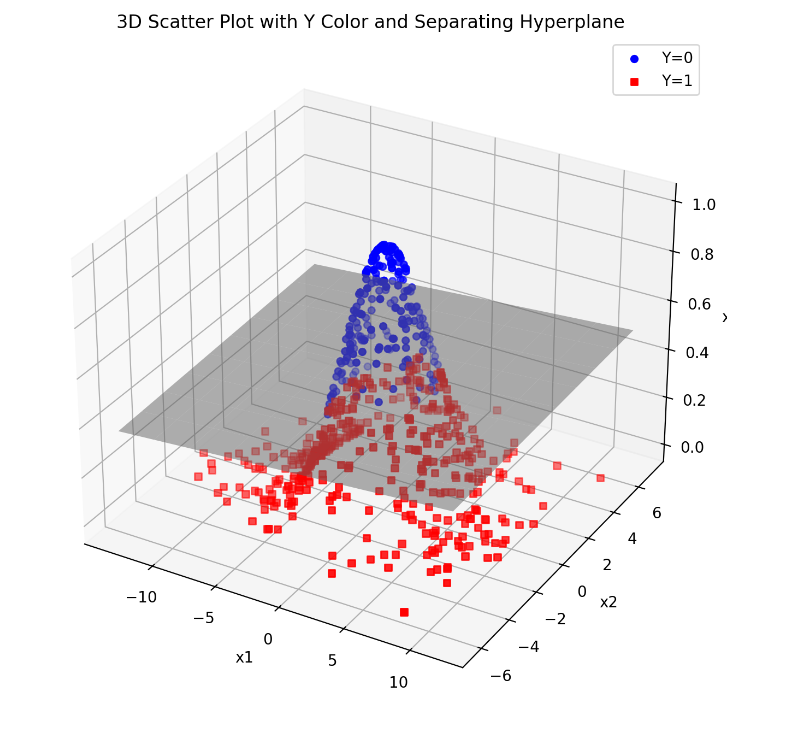

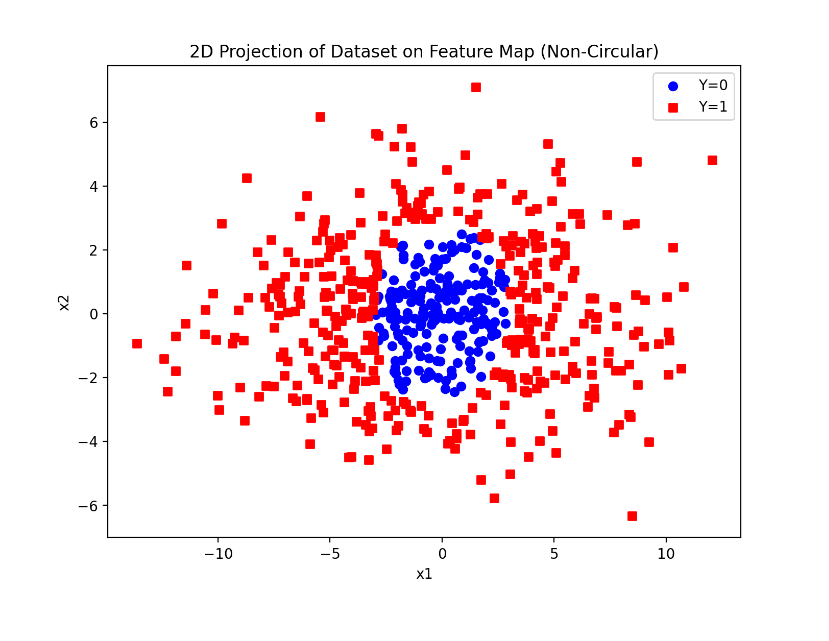